# Posthoc Analysis of IMAGEN:

The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>
<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
#################################################################################
# imagen_posthoc_visualization work may be needed
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from imagen_posthocloader import *

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# for i, j in Test.groupby('Dataset'):
#     j['Openness mean'].plot.hist(label=i, alpha=0.2)
# plt.legend()

In [ ]:
# def violin_plot(DATA, ROI):
#     for col in ROI:
#         sns.set(style="whitegrid", font_scale=1)
#         fig, axes = plt.subplots(nrows=1, ncols=len(DATA), figsize = ((len(DATA)+1)**2, len(DATA)+1))
#         fig.suptitle(f'{col}', fontsize=15)
#         for i, (Key, DF) in enumerate(DATA):
#             axes[i].set_title(f'{Key} = {str(len(DF[col].dropna()))}')
#             sns.violinplot(x="Class", y=col, data = DF, order=['HC', 'AAM'],
#                            inner="quartile", ax = axes[i], palette="Set2")
#             add_stat_annotation(ax = axes[i], data=DF, x="Class", y=col,
#                                 box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                                 test='t-test_ind', text_format='star', loc='inside')

In [ ]:
# # session plot
# for (S, DF) in [('FU2', binge_CTQ)]:
#     columns = col_binge_CTQ
#     sns.set(style="whitegrid", font_scale=1.5)
#     fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
#                              figsize=((len(columns)+1)**2, len(columns)+1))
#     sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
#                   ax = axes[0], palette="Set2").set(title=S)
    
#     for i, j in enumerate(columns):
#         axes[i+1].set_title(columns[i])
#         sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
#                        inner="quartile", ax = axes[i+1], palette="Set1")
#         add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
#                             box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                             test='t-test_ind', text_format='star', loc='inside') 

In [2]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

# 1. Summary Statistics

## 1.1. Psychological profile

See the list of Summary Statistics on Psychological profile:
<br>
Do the posthoc analysis on the following questionnaires and generate the summary statistics:
1. <b>NEO-PI-R</b>: NEO Personality Inventory based on Five-Factor Model of personality (Costa & McCrae, 1992)
2. <b>SURPS</b>: Substance Use Risk Profile Scale (Conrod & Woicik, 2002, Woicik et al., 2009)

### 1.1.1. NEO-PI-R ###
The NEO-PI-R is a valid method of assessing broad dimensions of personality (De Fruyt, et al. 2000) based on the Five-Factor Model of personality (Costa and McCrea, 1997).<br>
- <b>Openness mean</b>: mean of imagination, feelings, actions, ideas
- <b>Conscientiousness mean</b>: mean of competence, self-discipline, thoughtfulness, goal-driven
- <b>Extroversion mean</b>: mean of sociability, assertiveness, emotional expression
- <b>Agreeableness mean</b>: mean of cooperative, trustworthy, good-natured
- <b>Neuroticism mean</b>: mean of tendency toward unstable emotions

<b> Load the dataset </b>

In [3]:
NEO = posthoc.get_INSTRUMENT('all_NEO.csv')
col = NEO.columns[2:]

<b> ROI 01: compare the NEO in session </b>

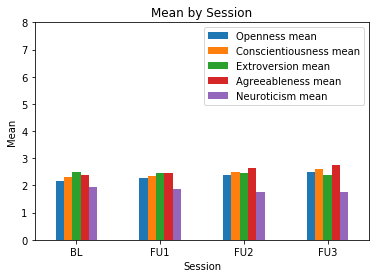

,Openness mean,Conscientiousness mean,Extroversion mean,Agreeableness mean,Neuroticism mean
Session,,,,,
BL,2.167873,2.296041,2.501056,2.400792,1.934012
FU1,2.277479,2.358771,2.452210,2.475757,1.867881
FU2,2.401118,2.495407,2.449480,2.633577,1.753154
FU3,2.506138,2.620164,2.400670,2.736793,1.772507


In [4]:
DF = NEO.groupby('Session')[col].mean()
DF.plot.bar(rot=0)
plt.title("Mean by Session")
plt.xlabel("Session")
plt.ylabel("Mean")
plt.ylim(0, 8)
plt.show()
NEO.groupby('Session')[col].mean()

Conclusion 01: <b> Openness mean </b>, <b> Conscientiousness mean </b>, and <b> Agreeableness mean </b> increased. In other hand, <b> Extroversion mean </b>, and <b> Neuroticism mean </b> decreased.

<b> ROI 02: compare the Binge-NEO in FU3 </b>

In [9]:
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_NEO = pd.merge(BINGE, NEO, on=['ID','Session'], how='inner')
Binge_NEO_FU3 = Binge_NEO.groupby('Session').get_group('FU3')

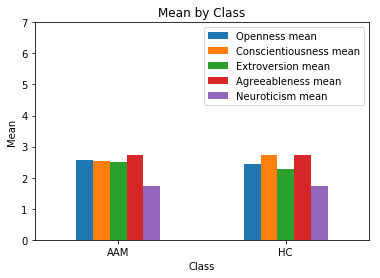

,Openness mean,Conscientiousness mean,Extroversion mean,Agreeableness mean,Neuroticism mean
Class,,,,,
AAM,2.583920,2.538732,2.516236,2.736307,1.734937
HC,2.433899,2.725309,2.291409,2.727366,1.744084


In [10]:
DF = Binge_NEO_FU3.groupby('Class')[col].mean()
DF.plot.bar(rot=0)
plt.title("Mean by Class")
plt.xlabel("Class")
plt.ylabel("Mean")
plt.ylim(0, 7)
plt.show()
Binge_NEO_FU3.groupby('Class')[col].mean()

Conclusion 02: AAM's <b> Openness mean </b>, <b> Extroversion mean </b>, and <b> Agreeableness mean </b> higher than HC's means. In other hand, AAM's <b> Conscientiousness mean </b>, and <b> Neuroticism mean </b> lower than HC's mean.

<b> ROI 03: summary statistics on Binge-NEO in FU3 </b>

In [6]:
# plot demographic statistic
# inference statistics

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.225e-04 stat=-3.710e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.178e-05 stat=4.273e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.281e-08 stat=-5.753e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

,Openness mean,Conscientiousness mean,Extroversion mean,Agreeableness mean,Neuroticism mean
Class,,,,,
AAM,2.583920,2.538732,2.516236,2.736307,1.734937
HC,2.433899,2.725309,2.291409,2.727366,1.744084


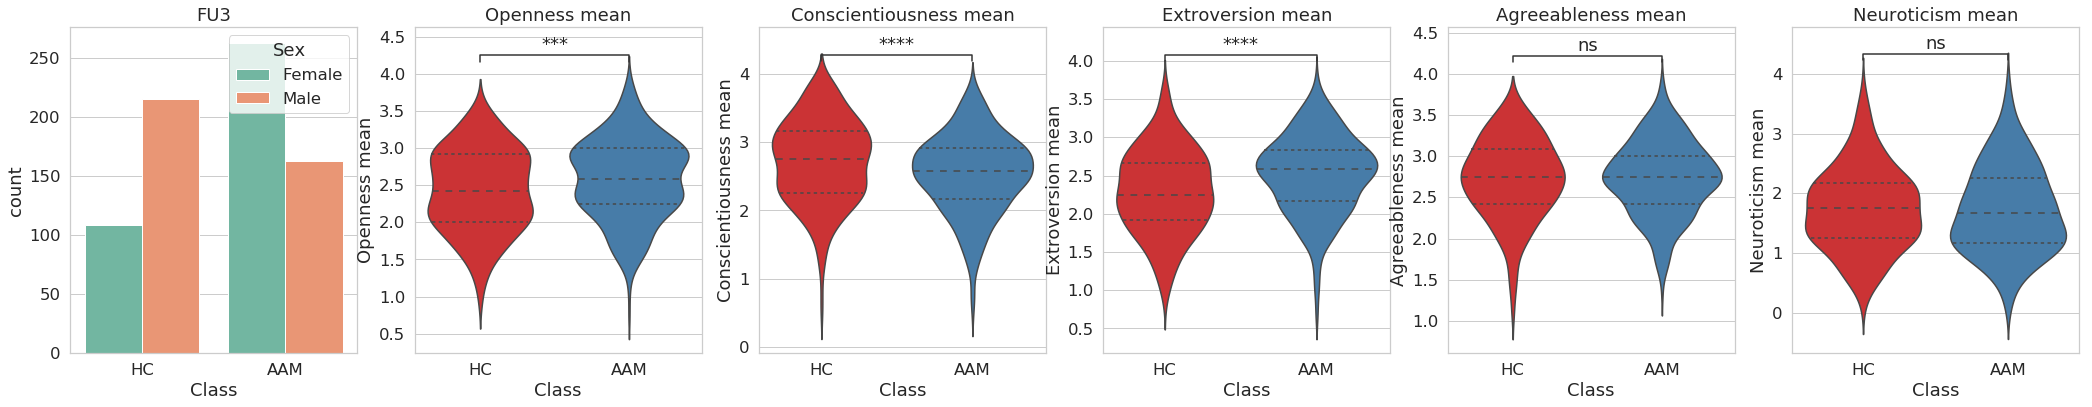

In [11]:
# session plot
for (S, DF) in [('FU3', Binge_NEO_FU3)]:
    columns = col
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside')
Binge_NEO_FU3.groupby('Class')[col].mean()

<b> ROI 03: All sesson (BL, FU1, FU2, and FU3) </b>

In [ ]:
# violinplot
# DATA = [('BL, All', binge_NEO_BL), ('FU1, All', binge_NEO_FU1),
#         ('FU2, All', binge_NEO_FU2), ('FU3, All', binge_NEO_FU3)]
# ROI = col_binge_NEO
# violin_plot(DATA, ROI)
# df_binge_NEO.groupby(['Session','Class'])[col_binge_NEO].mean()

Conclusion 03: <b> Both Extroversion mean and Conscientiouss mean showed statitical significance in All session [BL, FU1, FU2, and FU3] </b>. Next, Agreeableness mean showed significance in All session except FU3. On the one hand, <b> Neuroticism mean has no difference between the mean of HC and AAM</b>. On the other hand, Openess mean showed siginifance between FU2 to FU3, but no signicance in both BL, and FU1.

<b> ROI 04: All sesson with Sex (Male, Female) </b>

In [ ]:
# DATA = [('FU3, Male',binge_NEO_FU3_M),('FU2, Male',binge_NEO_FU2_M),
#         ('FU1, Male',binge_NEO_FU1_M),('BL, Male',binge_NEO_BL_M),
#         ('FU3, Female',binge_NEO_FU3_F),('FU2, Female',binge_NEO_FU2_F),
#         ('FU1, Female',binge_NEO_FU1_F),('BL, Female',binge_NEO_BL_F)]
# ROI = col_binge_NEO

# violin_plot(DATA, ROI)
# df_binge_NEO.groupby(['Session','Sex','Class'])[col_binge_NEO].mean()

Conclusion 04: Extroversion mean result constant in both Sex and all group. Conscientiousness mena nearly constant in both Sex and all group except FU3 Female, and BL Female. <b> In Extroverson mean, there is a significant difference between the means of HC, and ACC in both Sex. </b>

<b> ROI 05: All sesson with only Male </b>

In [ ]:
# DATA = [('FU3, Male',binge_NEO_FU3_M),('FU2, Male',binge_NEO_FU2_M),
#         ('FU1, Male',binge_NEO_FU1_M),('BL, Male',binge_NEO_BL_M)]
# ROI = col_binge_NEO
# violin_plot(DATA, ROI)
# df_binge_NEO.groupby(['Session','Class','Sex'])[ROI].mean()

Conclusion: Result 04 only Male

<b> ROI 06: All sesson with only Female </b>

In [ ]:
# DATA = [('FU3, Female',binge_NEO_FU3_F),('FU2, Female',binge_NEO_FU2_F),
#         ('FU1, Female',binge_NEO_FU1_F),('BL, Female',binge_NEO_BL_F)]
# ROI = col_binge_NEO
# violin_plot(DATA, ROI)
# df_binge_NEO.groupby(['Session','Class','Sex'])[ROI].mean()

Conclusion: Result 04 only Female

<b> ROI 07: All sesson with All, Male, and Female </b>

In [ ]:
# DATA = [('FU3, All',binge_NEO_FU3), ('FU3, Male',binge_NEO_FU3_M), ('FU3, Female',binge_NEO_FU3_F),
#         ('FU2, All',binge_NEO_FU2), ('FU2, Male',binge_NEO_FU2_M), ('FU2, Female',binge_NEO_FU2_F),
#         ('FU1, All',binge_NEO_FU1), ('FU1, Male',binge_NEO_FU1_M), ('FU1, Female',binge_NEO_FU1_F),
#         ('BL, All',binge_NEO_BL), ('BL, Male',binge_NEO_BL_M), ('BL, Female',binge_NEO_BL_F)]
# ROI = col_binge_NEO
# violin_plot(DATA, ROI)
# df_binge_NEO.groupby(['Session','Sex','Class'])[col_binge_NEO].mean()

Conclusion 07: Same as Concolusion in Result 03, and Result 04

<b> ROI 08: Correlation between Columns in NEO </b>

In [ ]:
# corr_df = df_binge_NEO[col_binge_NEO].corr(method='pearson')
# # Correlation in All session
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_df, annot=True)
# plt.show()

<b> ROI 09: BL Session </b>

In [ ]:
# # BL Session
# DF = binge_NEO_BL
# stat_binge_BL_NEO = IMAGEN_inference(DF, DF.columns)
# stat_binge_BL_NEO.violinplot()
# stat_binge_BL_NEO.inference_statistics()
# stat_binge_BL_NEO.demographic_plot()

<b> ROI 09: FU1 Session </b>

In [ ]:
# # FU1 Session
# DF = binge_NEO_FU1
# stat_binge_FU1_NEO = IMAGEN_inference(DF, DF.columns)
# stat_binge_FU1_NEO.violinplot()
# stat_binge_FU1_NEO.inference_statistics()
# stat_binge_FU1_NEO.demographic_plot()

<b> ROI 10: FU2 Session </b>

In [ ]:
# # FU2 Session
# DF = binge_NEO_FU2
# stat_binge_FU2_NEO = IMAGEN_inference(DF, DF.columns)
# stat_binge_FU2_NEO.violinplot()
# stat_binge_FU2_NEO.inference_statistics()
# stat_binge_FU2_NEO.demographic_plot()

<b> ROI 11: FU3 Session </b>

In [ ]:
# # FU3 Session
# DF = binge_NEO_FU3
# stat_binge_FU3_NEO = IMAGEN_inference(DF, DF.columns)
# stat_binge_FU3_NEO.violinplot()
# stat_binge_FU3_NEO.inference_statistics()
# stat_binge_FU3_NEO.demographic_plot()

<b> ROI 12: One session with Site, FU3 </b>

(to do)

<b> ROI 13: All session with Site </b>

(to do)

<b> ROI 14: All session with Sex and Site

(to do)

### 1.1.2. SURPS ###
Assesses lower order personality traits related to psychopathology (e.g., anxiety sensitivity, thrill seeking, pessimism and impulsivity). The Substance Use Risk Profile Scale (SURPS; Conrod & Woicik, 2002) assesses levels of several personality risk factors for substance abuse/dependence and psychopathology.
- <b>Anxiety sensitivity mean</b>: mean of anxiety sensitivity
- <b>Hopelessness mean</b>: mean of hopelessness
- <b>Impulsivity mean</b>: mean of impuls?ivity
- <b>Sensation seeking mean</b>: mean of sensation seeking

<b> Load the dataset </b>

In [12]:
SURPS = posthoc.get_INSTRUMENT('all_SURPS.csv')
col = SURPS.columns[2:]

<b> ROI 01: compare the Binge-SURPS in All Session </b>

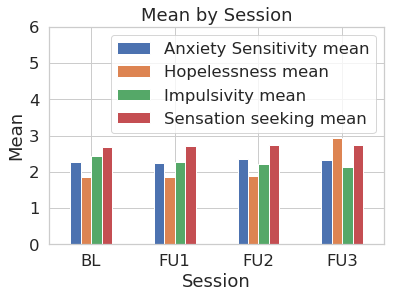

,Anxiety Sensitivity mean,Hopelessness mean,Impulsivity mean,Sensation seeking mean
Session,,,,
BL,2.259192,1.869593,2.446028,2.695264
FU1,2.241507,1.858339,2.272129,2.700957
FU2,2.345259,1.877510,2.215871,2.741089
FU3,2.339851,2.926013,2.131493,2.742910


In [13]:
DF = SURPS.groupby('Session')[col].mean()
DF.plot.bar(rot=0)
plt.title("Mean by Session")
plt.xlabel("Session")
plt.ylabel("Mean")
plt.ylim(0, 6)
plt.show()
SURPS.groupby('Session')[col].mean()

Conclusion: 

<b> ROI 02: compare the Binge-SURPS in FU3 </b>

In [14]:
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_SURPS = pd.merge(BINGE, SURPS, on=['ID','Session'], how='inner')
Binge_SURPS_FU3 = Binge_SURPS.groupby('Session').get_group('FU3')

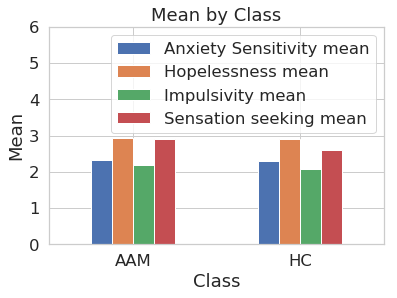

,Anxiety Sensitivity mean,Hopelessness mean,Impulsivity mean,Sensation seeking mean
Class,,,,
AAM,2.315294,2.938824,2.177412,2.910980
HC,2.298148,2.909612,2.090741,2.590021


In [15]:
DF = Binge_SURPS_FU3.groupby('Class')[col].mean()
DF.plot.bar(rot=0)
plt.title("Mean by Class")
plt.xlabel("Class")
plt.ylabel("Mean")
plt.ylim(0, 6)
plt.show()
Binge_SURPS_FU3.groupby('Class')[col].mean()

Conclusion:

<b> ROI 03: summary statistics on Binge-SURPS in FU3 </b>

In [16]:
# inference
# plot demographic statistic
# violinplot
# inference statistics

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.466e-01 stat=-4.586e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.864e-01 stat=-1.067e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.542e-03 stat=-2.679e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

,Anxiety Sensitivity mean,Hopelessness mean,Impulsivity mean,Sensation seeking mean
Class,,,,
AAM,2.315294,2.938824,2.177412,2.910980
HC,2.298148,2.909612,2.090741,2.590021


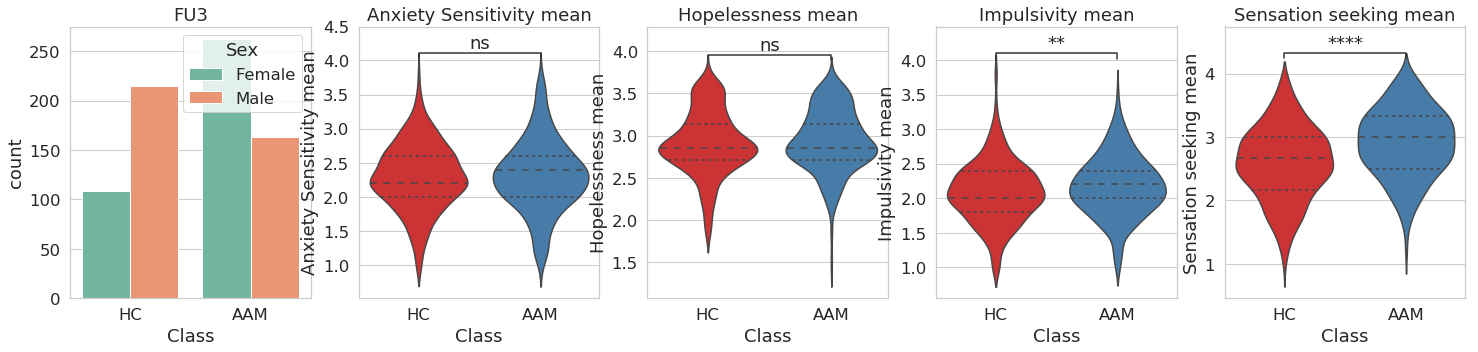

In [17]:
# session plot
for (S, DF) in [('FU3', Binge_SURPS_FU3)]:
    columns = col
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside')
Binge_SURPS_FU3.groupby('Class')[col].mean()

Conclusion 03: <b> Both Impulsivity mean and Sensation seeking mean showed the statistical significance between mean of the HC and AAM in All session </b>. The other showed no difference except BL in Anxiety sensitivity mean.

<b> ROI 04: All sesson (BL, FU1, FU2, and FU3) </b>

In [ ]:
# DATA = [('BL, All', binge_SURPS_BL), ('FU1, All', binge_SURPS_FU1),
#         ('FU2, All', binge_SURPS_FU2), ('FU3, All', binge_SURPS_FU3)]
# ROI = col_binge_SURPS

# violin_plot(DATA, ROI)
# df_binge_SURPS.groupby(['Session','Class'])[ROI].mean()

Conclusion: <b> Both Impulsivity mean and Sensation seeking mean showed the statistical significance between mean of the HC and AAM in All session </b>. The other showed no difference except BL in Anxiety sensitivity mean.

<b> ROI 05: All sesson with Sex (Male, Female) </b>

In [ ]:
# DATA = [('FU3, Male',binge_SURPS_FU3_M),('FU2, Male',binge_SURPS_FU2_M),
#         ('FU1, Male',binge_SURPS_FU1_M),('BL, Male',binge_SURPS_BL_M),
#         ('FU3, Female',binge_SURPS_FU3_F),('FU2, Female',binge_SURPS_FU2_F),
#         ('FU1, Female',binge_SURPS_FU1_F),('BL, Female',binge_SURPS_BL_F)]
# ROI = col_binge_SURPS

# violin_plot(DATA, ROI)
# df_binge_SURPS.groupby(['Session','Sex','Class'])[ROI].mean()

Conclusion 05: Impulsivity mean showed non-constant in all sesson by sex. However, <b> Sensation seeking mean showed constant significance in all Session by Sex </b>. 

<b> ROI 06: All sesson with only Male </b>

In [ ]:
DATA = [('FU3, Male',binge_SURPS_FU3_M),('FU2, Male',binge_SURPS_FU2_M),
        ('FU1, Male',binge_SURPS_FU1_M),('BL, Male',binge_SURPS_BL_M)]
ROI = col_binge_SURPS

violin_plot(DATA, ROI)
df_binge_SURPS.groupby(['Session','Class','Sex'])[ROI].mean()

Conclusion 06:

<b> ROI 07: All session with only Female </b>

In [ ]:
violin_plot(DATA, ROI)
df_binge_SURPS.groupby(['Session','Class','Sex'])[ROI].mean()

Conclusion 07:

<b> ROI 08: All sesson with All, Male, and Female </b>

In [ ]:
DATA = [('FU3, All',binge_SURPS_FU3), ('FU3, Male',binge_SURPS_FU3_M), ('FU3, Female',binge_SURPS_FU3_F),
        ('FU2, All',binge_SURPS_FU2), ('FU2, Male',binge_SURPS_FU2_M), ('FU2, Female',binge_SURPS_FU2_F),
        ('FU1, All',binge_SURPS_FU1), ('FU1, Male',binge_SURPS_FU1_M), ('FU1, Female',binge_SURPS_FU1_F),
        ('BL, All',binge_SURPS_BL), ('BL, Male',binge_SURPS_BL_M), ('BL, Female',binge_SURPS_BL_F)]
ROI = col_binge_SURPS

violin_plot(DATA, ROI)
df_binge_SURPS.groupby(['Session','Sex','Class'])[ROI].mean()

<b> ROI 09: Correlation between Columns in SURPS </b>

In [ ]:
# corr_df = df_binge_SURPS[col_binge_SURPS].corr(method='pearson')
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_df, annot=True)
# plt.show()

<b> ROI 10: BL session </b>

In [ ]:
# DF = binge_SURPS_BL
# stat_binge_BL_SURPS = IMAGEN_inference(DF, DF.columns)

# stat_binge_BL_SURPS.violinplot()
# stat_binge_BL_SURPS.inference_statistics()
# stat_binge_BL_SURPS.demographic_plot()

<b> ROI 11: FU1 session </b>

In [ ]:
# DF = binge_SURPS_FU1
# stat_binge_FU1_SURPS = IMAGEN_inference(DF, DF.columns)

# stat_binge_FU1_SURPS.violinplot()
# stat_binge_FU1_SURPS.inference_statistics()
# stat_binge_FU1_SURPS.demographic_plot()

<b> ROI 12: FU2 session </b>

In [ ]:
# DF = binge_SURPS_FU2
# stat_binge_FU2_SURPS = IMAGEN_inference(DF, DF.columns)

# stat_binge_FU2_SURPS.violinplot()
# stat_binge_FU2_SURPS.inference_statistics()
# stat_binge_FU2_SURPS.demographic_plot()

<b> ROI 13: FU3 session </b>

In [ ]:
# DF = binge_SURPS_FU3
# stat_binge_FU3_SURPS = IMAGEN_inference(DF, DF.columns)

# stat_binge_FU3_SURPS.violinplot()
# stat_binge_FU3_SURPS.inference_statistics()
# stat_binge_FU3_SURPS.demographic_plot()

<b> ROI 14: One session with Site, FU3 </b>

(to do)

<b> ROI 15: FU3 session with Site </b>

(to do)

<b> ROI 18: All session with Site </b>

(to do)

<b> ROI 19: All session with Sex and Site

(to do)

## 1.2. Socio-economic profile

See the list of Summary Statistics on Socio-economic profile:
Do the posthoc analysis on the following questionnaires and generate the summary statistics:
<br>
1. <b>CTQ-SF</b>: The Childhood Trauma Questionnaire (Bernstein & Fink, 1997)
2. <b>CTS</b>: Conflict Tactics Scale (Bernstein & Fink, 1997)
3. <b>LEQ</b>: Life-Events Questionnaire (adapted from Newcomb et al., 1981)
4. <b>PBQ</b>: Pregnancy and Birth Questionnaire (adapted from Pausova et al., 2007) 
5. <b>GEN</b>: Genetics Screening and Family History of Psychiatric Disorders Interview

### 1.2.1. CTQ_SF
The Childhood Trauma Questionnaire (CTQ, Bernstein & Fink, 1997) is a 28-item self-report inventory that provides brief, reliable, and valid screening for histories of abuse and neglect. It inquires about five types of maltreatment - emotional, physical, and sexual abuse, and emotional and physical neglect. Also included is a 3 item Minimization /Denial scale for detecting false-negative trauma reports. The CTQ has been widely and successfully employed in several studies including gene-neuroimaging studies (Caspi et al., 2010). Suitable for adolescents and adults 12+ years.
<br>
- <b>Emotional abuse sum</b> 
- <b>Physical abuse sum</b> 
- <b>Sexual abuse sum</b>
- <b>Emotional neglect sum</b>
- <b>Physical neglect sum</b> 
- <b>Denial sum</b>

<b> Load the dataset </b>

In [18]:
CTQ = posthoc.get_INSTRUMENT('all_CTQ.csv')
col = CTQ.columns[2:]

In [19]:
CTQ.groupby('Session')[col].mean()

,Emotional abuse sum,Physical abuse sum,Sexual abuse sum,Emotional neglect sum,Physical neglect sum,Denial sum
Session,,,,,,
BL,2.180292,0.452555,0.328467,16.90219,7.858394,8.221898
FU1,2.180292,0.452555,0.328467,16.90219,7.858394,8.221898
FU2,2.180292,0.452555,0.328467,16.90219,7.858394,8.221898
FU3,2.180292,0.452555,0.328467,16.90219,7.858394,8.221898


<b> ROI 01: summary statistics on Binge-CTQ </b>

In [20]:
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_CTQ = pd.merge(BINGE, CTQ, on=['ID','Session'], how='inner')
Binge_CTQ_FU3 = Binge_CTQ.groupby('Session').get_group('FU3')

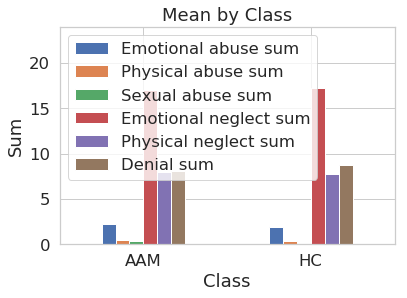

,Emotional abuse sum,Physical abuse sum,Sexual abuse sum,Emotional neglect sum,Physical neglect sum,Denial sum
Class,,,,,,
AAM,2.223164,0.468927,0.418079,16.997175,7.949153,8.059322
HC,1.926471,0.334559,0.180147,17.275735,7.786765,8.805147


In [21]:
DF = Binge_CTQ_FU3.groupby('Class')[col].mean()
DF.plot.bar(rot=0)
plt.title("Mean by Class")
plt.xlabel("Class")
plt.ylabel("Sum")
plt.ylim(0, 24)
plt.show()
Binge_CTQ_FU3.groupby('Class')[col].mean()

Conclusion 01:

<b> ROI 02: summary statistics on Binge-CTQ in FU2 </b>

In [16]:
# inference
# plot demographic statistic
# violinplot
# inference statistics

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.763e-01 stat=-1.354e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.162e-01 stat=-1.238e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.845e-02 stat=-1.706e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

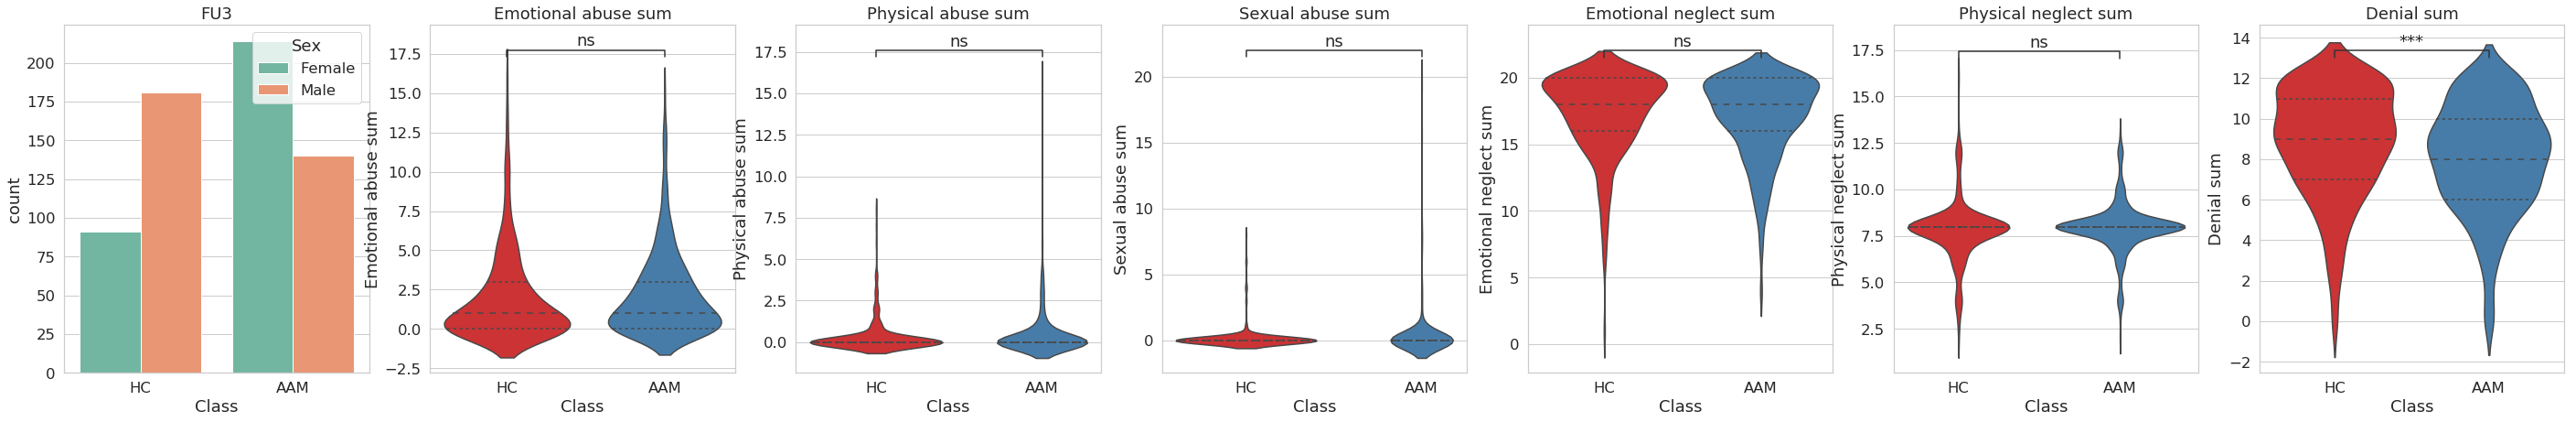

In [22]:
# session plot
for (S, DF) in [('FU3', Binge_CTQ_FU3)]:
    columns = col
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

Conclusion 02:

<b> ROI 03: Childhood trauma with All, and Sex

In [ ]:
# DATA = [('All',binge_CTQ), ('Male',binge_CTQ_M), ('Female',binge_CTQ_F)]
# ROI = col_binge_CTQ
# violin_plot(DATA, ROI)
# binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

Conclusion 03: Denial sum showed that Statistical significance in All, Male, and Female. 

In [ ]:
# binge_CTQ.columns = binge_CTQ.columns.str.replace(' ','_')
# pd.crosstab([binge_CTQ.Denial_sum], [binge_CTQ.Class,binge_CTQ.Sex],margins=True)

# DF = df_binge_CTQ
# stat_binge_CTQ = IMAGEN_inference(DF, DF.columns)
# stat_binge_CTQ.violinplot()
# stat_binge_CTQ.inference_statistics()
# stat_binge_CTQ.demographic_plot()

### 1.2.2. CTS
Conflict Tactics Scale (CTS)

<b> Load the dataset </b>

In [23]:
CTS = posthoc.get_INSTRUMENT('all_CTS.csv')
col = CTS.columns[2:]
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_CTS = pd.merge(BINGE, CTS, on=['ID','Session'], how='inner')
Binge_CTS_FU3 = Binge_CTS.groupby('Session').get_group('FU3')

<b> ROI 01. Conflict Tactics Scale (CTS) </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.196e-01 stat=-8.075e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=9.796e-01 stat=-2.562e-02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.501e-02 stat=-2.438e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

,Assault mean,Injury mean,Negotiation mean,Psychological Aggression mean,Sexual Coercion mean
Class,,,,,
AAM,0.038015,0.022548,7.552058,0.979722,0.298325
HC,0.026557,0.022236,6.497329,0.840545,0.476496


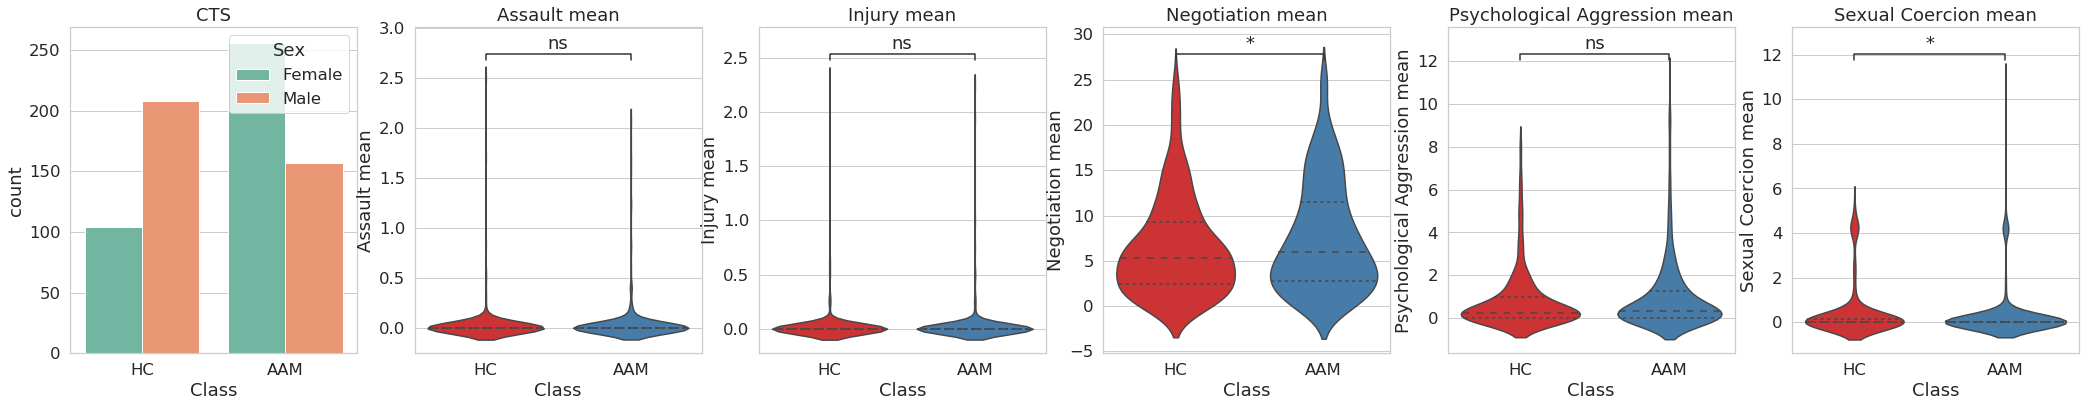

In [24]:
# session plot
for (S, DF) in [('CTS', Binge_CTS_FU3)]:
    columns = col
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside')
Binge_CTS_FU3.groupby(['Class'])[col].mean()

### 1.2.3. LEQ

<b> Load the dataset </b>

In [25]:
LEQ = posthoc.get_INSTRUMENT('all_LEQ.csv')
col = LEQ.columns[2:]
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_LEQ = pd.merge(BINGE, LEQ, on=['ID','Session'], how='inner')
Binge_LEQ_FU3 = Binge_LEQ.groupby('Session').get_group('FU3')

In [ ]:
# binge_LEQ_Session = df_binge_LEQ.groupby(['Session'])
# binge_LEQ_BL = binge_LEQ_Session.get_group('BL')
# binge_LEQ_FU1 = binge_LEQ_Session.get_group('FU1')
# binge_LEQ_FU2 = binge_LEQ_Session.get_group('FU2')
# binge_LEQ_FU3 = binge_LEQ_Session.get_group('FU3')

In [ ]:
# binge_LEQ_BL_Sex = binge_LEQ_BL.groupby(['Sex'])
# binge_LEQ_BL_Sex_M = binge_LEQ_BL_Sex.get_group('Male')
# binge_LEQ_BL_Sex_F = binge_LEQ_BL_Sex.get_group('Female')
# binge_LEQ_FU1_Sex = binge_LEQ_FU1.groupby(['Sex'])
# binge_LEQ_FU1_Sex_M = binge_LEQ_FU1_Sex.get_group('Male')
# binge_LEQ_FU1_Sex_F = binge_LEQ_FU1_Sex.get_group('Female')
# binge_LEQ_FU2_Sex = binge_LEQ_FU2.groupby(['Sex'])
# binge_LEQ_FU2_Sex_M = binge_LEQ_FU2_Sex.get_group('Male')
# binge_LEQ_FU2_Sex_F = binge_LEQ_FU2_Sex.get_group('Female')
# binge_LEQ_FU3_Sex = binge_LEQ_FU3.groupby(['Sex'])
# binge_LEQ_FU3_Sex_M = binge_LEQ_FU3_Sex.get_group('Male')
# binge_LEQ_FU3_Sex_F = binge_LEQ_FU3_Sex.get_group('Female')

<b> ROI 01: All sesson (BL, FU1, FU2, and FU3)</b>

In [26]:
Binge_LEQ.groupby(['Session','Class'])[col].mean()

Family valence  Accident valence  Sexuality valence  \
Session Class                                                        
BL      AAM         -1.107732         -1.222294          -0.005891   
        HC          -1.108923         -1.173077           0.007473   
FU2     AAM         -1.075000         -1.137755          -0.017128   
        HC          -1.023975         -1.127760           0.058134   
FU3     AAM         -0.416000          0.510000          -0.267899   
        HC          -0.405556          0.585648          -0.200176   

               Autonomy valence  Devience valence  Relocation valence  \
Session Class                                                           
BL      AAM            1.027062         -0.936426           -0.339347   
        HC             0.935769         -0.996923           -0.404103   
FU2     AAM            1.090561         -0.906463           -0.683673   
        HC             1.004732         -1.045216           -0.426919   
FU3     AAM           -0.241471         -0.831373           -0.085490   
        HC            -0.241512         -0.823045           -0.009259   

               Distress valence  Noscale valence  Overall valence  \
Session Class                                                       
BL      AAM           -1.132732         0.128866        -0.320248   
        HC            -0.995385         0.149744        -0.318580   
FU2     AAM           -1.136054         0.107993        -0.322671   
        HC            -1.034700         0.174553        -0.289412   
FU3     AAM           -0.217255         0.653333        -0.152338   
        HC            -0.218107         0.734568        -0.118471   

               Family mean frequency  Accident mean frequency  \
Session Class                                                   
BL      AAM                 0.268041                 0.509665   
        HC                  0.201231                 0.506923   
FU2     AAM                 0.121939                 0.326531   
        HC                  0.112303                 0.344637   
FU3     AAM                 0.177882                 0.235294   
        HC                  0.142593                 0.251543   

               Sexuality mean frequency  Autonomy mean frequency  \
Session Class                                                      
BL      AAM                    0.280560                 0.544459   
        HC                     0.264615                 0.513077   
FU2     AAM                    0.361880                 0.611607   
        HC                     0.330329                 0.575710   
FU3     AAM                    0.248067                 0.198529   
        HC                     0.276896                 0.214506   

               Devience mean frequency  Relocation mean frequency  \
Session Class                                                       
BL      AAM                   0.306701                   0.452749   
        HC                    0.205128                   0.412308   
FU2     AAM                   0.137755                   0.094388   
        HC                    0.055731                   0.110410   
FU3     AAM                   0.280000                   0.093333   
        HC                    0.287037                   0.101852   

               Distress mean frequency  Noscale mean frequency  \
Session Class                                                    
BL      AAM                   0.238402                0.307560   
        HC                    0.295385                0.339487   
FU2     AAM                   0.211310                0.285714   
        HC                    0.191903                0.290221   
FU3     AAM                   0.286667                0.230588   
        HC                    0.276749                0.183128   

               Overall mean frequency  
Session Class                          
BL      AAM                  0.367433  
        HC                   0.349586  
FU2     

Concluson 01:

<b> ROI 02: All sesson (BL, FU1, FU2, and FU3) in Valence </b>

In [ ]:
# # session plot
# for (S, DF) in [('BL', binge_LEQ_BL),('FU1', binge_LEQ_FU1),
#                 ('FU2', binge_LEQ_FU2),('FU3', binge_LEQ_FU3)]:
#     columns = col_binge_LEQ[:9]
#     sns.set(style="whitegrid", font_scale=1.5)
#     fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
#                              figsize=((len(columns)+1)**2, len(columns)+1))
#     sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
#                   ax = axes[0], palette="Set2").set(title=S)
    
#     for i, j in enumerate(columns):
#         axes[i+1].set_title(columns[i])
#         sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
#                        inner="quartile", ax = axes[i+1], palette="Set1")
#         add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
#                             box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                             test='t-test_ind', text_format='star', loc='inside')


In [ ]:
# df_binge_LEQ.groupby(['Session','Class'])[col_binge_LEQ[:9]].mean()

<b> ROI 02: All sesson (BL, FU1, FU2, and FU3) with Sex in Valence </b>

In [ ]:
# DATA = [('FU3, All',binge_LEQ_FU3),('FU2, All',binge_LEQ_FU2),('FU1, All',binge_LEQ_FU1),('BL, All',binge_LEQ_BL),
#         ('FU3, Male',binge_LEQ_FU3_Sex_M),('FU2, Male',binge_LEQ_FU2_Sex_M),('FU1, Male',binge_LEQ_FU1_Sex_M),('BL, Male',binge_LEQ_BL_Sex_M),
#         ('FU3, Female',binge_LEQ_FU3_Sex_F),('FU2, Female',binge_LEQ_FU2_Sex_F),('FU1, Female',binge_LEQ_FU1_Sex_F),('BL, Female',binge_LEQ_BL_Sex_F)]
# ROI = col_binge_LEQ[:9]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

<b> ROI 03: FU3 sesson with All, Sex in Valence </b>

In [ ]:
# DATA = [('FU3, All',binge_LEQ_FU3),
#         ('FU3, Male',binge_LEQ_FU3_Sex_M),
#         ('FU3, Female',binge_LEQ_FU3_Sex_F)]
# ROI = col_binge_LEQ[:9]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

<b> ROI 04: FU2 sesson with All, Sex in Valence </b>

In [ ]:
# DATA = [('FU2, All',binge_LEQ_FU2),
#         ('FU2, Male',binge_LEQ_FU2_Sex_M),
#         ('FU2, Female',binge_LEQ_FU2_Sex_F)]
# ROI = col_binge_LEQ[:9]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

<b> ROI 05: FU1 sesson with All, Sex in Valence </b>

In [ ]:
# DATA = [('FU1, All',binge_LEQ_FU1),
#         ('FU1, Male',binge_LEQ_FU1_Sex_M),
#         ('FU1, Female',binge_LEQ_FU1_Sex_F)]
# ROI = col_binge_LEQ[:9]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

<b> ROI 06: BL sesson with All, Sex in Valence </b>

In [ ]:
# DATA = [('BL, All',binge_LEQ_BL),
#         ('BL, Male',binge_LEQ_BL_Sex_M),
#         ('BL, Female',binge_LEQ_BL_Sex_F)]
# ROI = col_binge_LEQ[:9]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

In [ ]:
# df_binge_LEQ.columns = df_binge_LEQ.columns.str.replace(' ','_')

<b> ROI 07: Mean Frequency with Class in Session </b>

In [ ]:
# # session plot
# for (S, DF) in [('BL', binge_LEQ_BL),('FU1', binge_LEQ_FU1),
#                 ('FU2', binge_LEQ_FU2),('FU3', binge_LEQ_FU3)]:
#     columns = col_binge_LEQ[9:18]
#     sns.set(style="whitegrid", font_scale=1.5)
#     fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
#                              figsize=((len(columns)+1)**2, len(columns)+1))
#     sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
#                   ax = axes[0], palette="Set2").set(title=S)

#     for i, j in enumerate(columns):
#         axes[i+1].set_title(columns[i])
#         sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
#                        inner="quartile", ax = axes[i+1], palette="Set1")
#         add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
#                             box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                             test='t-test_ind', text_format='star', loc='inside') 

In [ ]:
# df_binge_LEQ.groupby(['Session','Class'])[col_binge_LEQ[9:18]].mean()

<b> ROI 08: Mean Frequency with Class in Sex, FU3 </b>

In [ ]:
# DATA = [('FU3, All',binge_LEQ_FU3),
#         ('FU3, Male',binge_LEQ_FU3_Sex_M),
#         ('FU3, Female',binge_LEQ_FU3_Sex_F)]
# ROI = col_binge_LEQ[9:18]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

# # DF = binge_LEQ_FU3
# # stat_binge_FU3_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# # stat_binge_FU3_LEQ.violinplot()
# # stat_binge_FU3_LEQ.inference_statistics()
# # stat_binge_FU3_LEQ.demographic_plot()

<b> ROI 09: Mean Frequency with Class in Sex, FU2 </b>

In [ ]:
# DATA = [('FU2, All',binge_LEQ_FU2),
#         ('FU2, Male',binge_LEQ_FU2_Sex_M),
#         ('FU2, Female',binge_LEQ_FU2_Sex_F)]
# ROI = col_binge_LEQ[9:18]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

# # DF = binge_LEQ_FU2
# # stat_binge_FU2_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# # stat_binge_FU2_LEQ.violinplot()
# # stat_binge_FU2_LEQ.inference_statistics()
# # stat_binge_FU2_LEQ.demographic_plot()

<b> ROI 10: Mean Frequency with Class in Sex, FU1 </b>

In [ ]:
# DATA = [('FU1, All',binge_LEQ_FU1),
#         ('FU1, Male',binge_LEQ_FU1_Sex_M),
#         ('FU1, Female',binge_LEQ_FU1_Sex_F)]
# ROI = col_binge_LEQ[9:18]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

# # DF = binge_LEQ_FU1
# # stat_binge_FU1_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# # stat_binge_FU1_LEQ.violinplot()
# # stat_binge_FU1_LEQ.inference_statistics()
# # stat_binge_FU1_LEQ.demographic_plot()

<b> ROI 11: Mean Frequency with Class in Sex, BL </b>

In [ ]:
# DATA = [('BL, All',binge_LEQ_BL),
#         ('BL, Male',binge_LEQ_BL_Sex_M),
#         ('BL, Female',binge_LEQ_BL_Sex_F)]
# ROI = col_binge_LEQ[9:18]

# violin_plot(DATA, ROI)
# binge_LEQ_BL.groupby(['Sex','Class'])[ROI].mean()

# # DF = binge_LEQ_BL
# # stat_binge_BL_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# # stat_binge_BL_LEQ.violinplot()
# # stat_binge_BL_LEQ.inference_statistics()
# # stat_binge_BL_LEQ.demographic_plot()

<b> ROI 12: FU3 valence </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.309e-01 stat=3.440e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.411e-02 stat=2.460e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=9.559e-03 stat=2.598e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bo

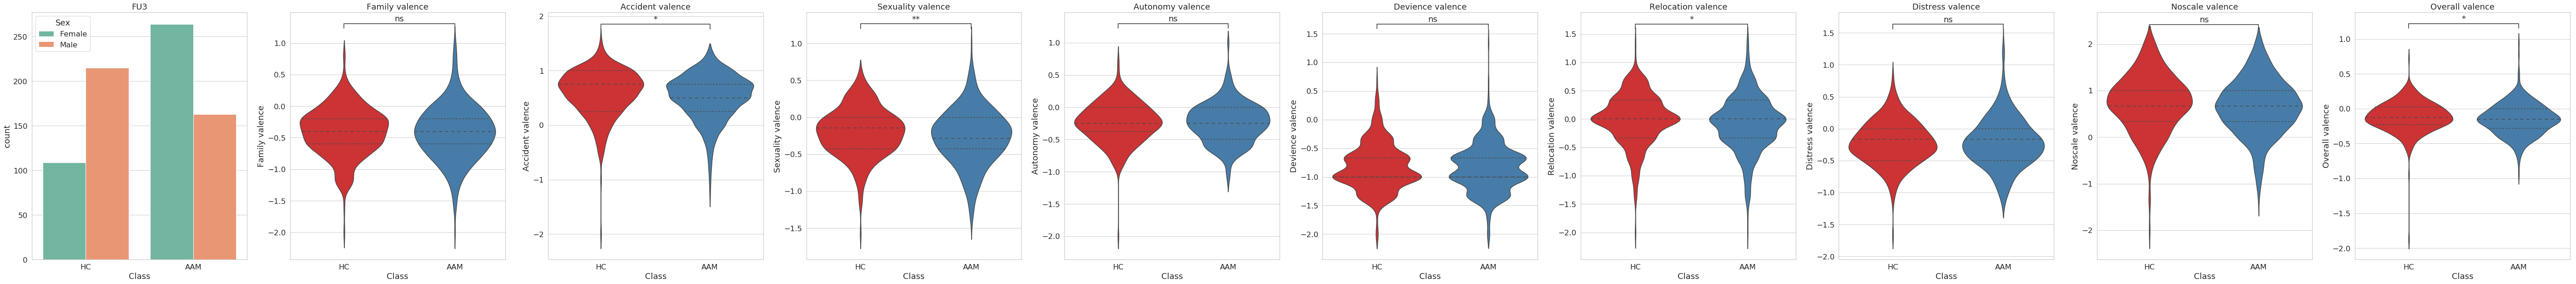

In [27]:
# session plot
for (S, DF) in [('FU3', Binge_LEQ_FU3)]:
    columns = col[0:9]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

Conclusion 12:

<b> ROI 13: FU3 mean frequency </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.464e-03 stat=-2.683e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.104e-02 stat=1.808e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.438e-02 stat=2.256e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

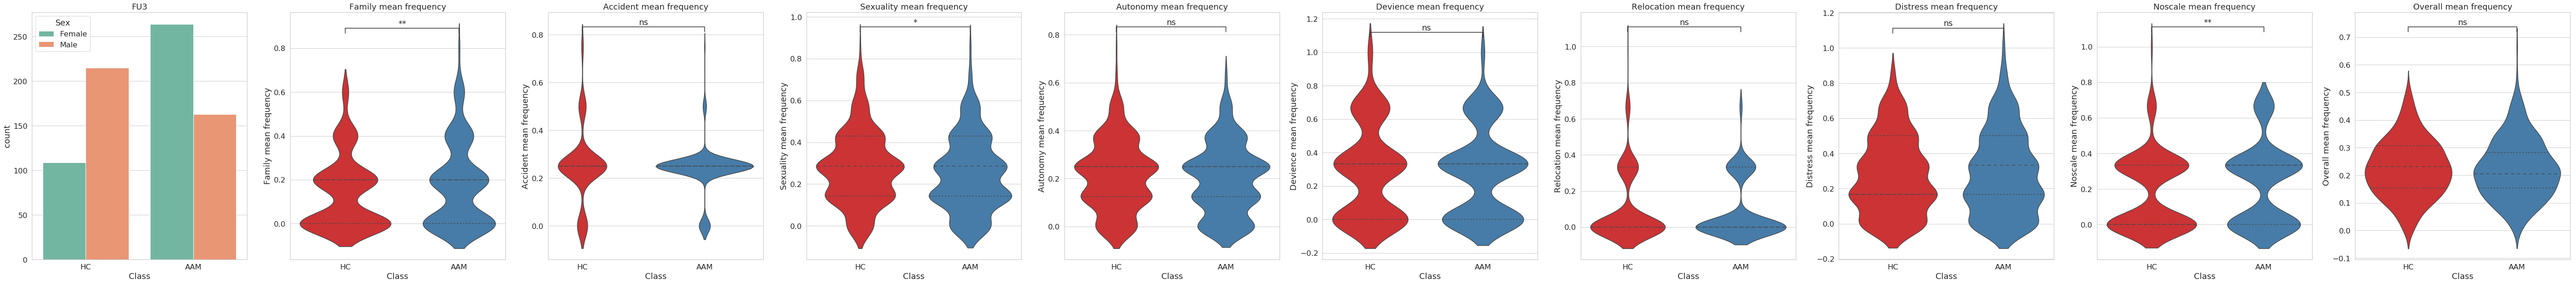

In [28]:
# session plot
for (S, DF) in [('FU3', Binge_LEQ_FU3)]:
    columns = col[9:18]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

Conclusion 13:

### 1.2.4. PBQ
Pregnancy and Birth Questionnaire (PBQ); self-report
- PBQ_03: 
- PBQ_05: 
- PBQ_06: 
- PBQ_12: 
- PBQ_13: 

<b> Load the dataset </b>

In [29]:
PBQ = posthoc.get_INSTRUMENT('all_PBQ.csv')
col = PBQ.columns[2:]
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_PBQ = pd.merge(BINGE, PBQ, on=['ID','Session'], how='inner')

In [30]:
Binge_PBQ.groupby(['Class']).count()

,ID,Session,y,Dataset,Sex,Site,pbq_03,pbq_03a,pbq_03b,pbq_03c,...,pbq_05a,pbq_05b,pbq_05c,pbq_06,pbq_06a,pbq_12,pbq_13,pbq_13a,pbq_13b,pbq_13g
Class,,,,,,,,,,,,,,,,,,,,,
AAM,322,322,322,322,322,322,322,184,184,184,...,40,40,40,184,23,322,322,103,103,103
HC,256,256,256,256,256,256,256,128,128,128,...,32,32,32,128,21,256,256,35,35,35


<b> ROI 01. PBQ_03</b>

In [31]:
pd.crosstab([Binge_PBQ.Class,Binge_PBQ.Sex],
            [Binge_PBQ.pbq_03],
            margins=True) #normalize=True,

pbq_03         No  Yes  All
Class Sex                  
AAM   Female   82  109  191
      Male     56   75  131
HC    Female   49   37   86
      Male     79   91  170
All           266  312  578

<b> ROI 02. Mother, Cigarette during Pregnancy PBQ_05 </b>

In [32]:
# binge_PBQ.groupby(['Class','Sex'])['pbq_05'].value_counts()
pd.crosstab([Binge_PBQ.Class,Binge_PBQ.Sex],
            [Binge_PBQ.pbq_05,Binge_PBQ.pbq_05a],
            margins=True)

pbq_05                          Yes                           \
pbq_05a      1-5 cigarettes per day 11-20 cigarettes per day   
Class Sex                                                      
AAM   Female                      9                        3   
      Male                        2                        5   
HC    Female                      4                        0   
      Male                       11                        2   
All                              26                       10   

pbq_05                                                         \
pbq_05a      21-30 cigarettes per day 6-10 cigarettes per day   
Class Sex                                                       
AAM   Female                        0                       9   
      Male                          0                       4   
HC    Female                        0                       5   
      Male                          1                       7   
All                                 1                      25   

pbq_05                                                                    All  
pbq_05a      Less than 1 cigarette per day Less than 1 cigarette per week      
Class Sex                                                                      
AAM   Female                             1                              2  24  
      Male                               3                              2  16  
HC    Female                             0                              0   9  
      Male                               1                              1  23  
All                                      5                              5  72

<b> ROI 03. Mother, Cigarette during Breast feeding PBQ_06 </b>

In [33]:
# binge_PBQ.groupby(['Class','Sex'])['pbq_06'].value_counts()
pd.crosstab([Binge_PBQ.Class,Binge_PBQ.Sex],
            [Binge_PBQ.pbq_06,Binge_PBQ.pbq_06a],
            margins=True)

pbq_06                          Yes                           \
pbq_06a      1-5 cigarettes per day 11-20 cigarettes per day   
Class Sex                                                      
AAM   Female                      7                        2   
      Male                        5                        1   
HC    Female                      2                        2   
      Male                        8                        1   
All                              22                        6   

pbq_06                                                         \
pbq_06a      21-30 cigarettes per day 6-10 cigarettes per day   
Class Sex                                                       
AAM   Female                        0                       1   
      Male                          0                       4   
HC    Female                        0                       4   
      Male                          1                       2   
All                                 1                      11   

pbq_06                                                   All  
pbq_06a      Less than 1 cigarette per day not available      
Class Sex                                                     
AAM   Female                             0             1  11  
      Male                               2             0  12  
HC    Female                             0             0   8  
      Male                               0             1  13  
All                                      2             2  44

<b> ROI 04. Mother, Drug during Pregnancy PBQ_12 </b>

In [34]:
# binge_PBQ.groupby(['Class','Sex'])['pbq_06'].value_counts()
pd.crosstab([Binge_PBQ.Class],
            [Binge_PBQ.pbq_12],
            margins=True)

pbq_12,No,Yes,not known,All
Class,,,,
AAM,320,2,0,322
HC,254,1,1,256
All,574,3,1,578


<b> ROI 05. Mother, Alcohols during Pregnancy PBQ_13 </b>

In [35]:
Binge_PBQ.groupby(['Class']).count()

,ID,Session,y,Dataset,Sex,Site,pbq_03,pbq_03a,pbq_03b,pbq_03c,...,pbq_05a,pbq_05b,pbq_05c,pbq_06,pbq_06a,pbq_12,pbq_13,pbq_13a,pbq_13b,pbq_13g
Class,,,,,,,,,,,,,,,,,,,,,
AAM,322,322,322,322,322,322,322,184,184,184,...,40,40,40,184,23,322,322,103,103,103
HC,256,256,256,256,256,256,256,128,128,128,...,32,32,32,128,21,256,256,35,35,35


In [36]:
# binge_PBQ.groupby(['Class','Sex'])['pbq_13'].value_counts()
pd.crosstab([Binge_PBQ.Sex,Binge_PBQ.pbq_13],
            [Binge_PBQ.Class],
            margins=True)
# sns.heatmap(pd.crosstab([binge_PBQ.Class,binge_PBQ.Sex],
#             [binge_PBQ.pbq_13],
#             normalize=True),
#             cmap="YlGnBu", annot=True, cbar=False)

Class             AAM   HC  All
Sex    pbq_13                  
Female No         135   73  208
       Yes         56   13   69
Male   No          84  147  231
       Yes         47   22   69
       not known    0    1    1
All               322  256  578

In [37]:
pd.crosstab([Binge_PBQ.pbq_13a,Binge_PBQ.Sex],
            [Binge_PBQ.Class],margins=True)
# sns.heatmap(pd.crosstab([binge_PBQ.pbq_13,binge_PBQ.pbq_13a],
#                         [binge_PBQ.Class,binge_PBQ.Sex]
#             ),
#             cmap="YlGnBu", annot=False, cbar=False)

Class                             AAM  HC  All
pbq_13a                   Sex                 
Four or more times a week Female    0   1    1
Monthly or less           Female   32   8   40
                          Male     24  13   37
Two to four times a month Female   19   3   22
                          Male     18   8   26
Two to three times a week Female    2   0    2
                          Male      2   0    2
not available             Female    2   0    2
                          Male      1   0    1
not known                 Female    1   1    2
                          Male      2   1    3
All                               103  35  138

In [38]:
pd.crosstab([Binge_PBQ.pbq_13a,Binge_PBQ.pbq_13g],
            [Binge_PBQ.Class,Binge_PBQ.Sex],
            margins=True) # normalize=True
# sns.heatmap(pd.crosstab([binge_PBQ.pbq_13a,binge_PBQ.pbq_13g],
#             [binge_PBQ.pbq_13,binge_PBQ.Class],
#             normalize=True),
#             cmap="YlGnBu", annot=False, cbar=False)

Class                                         AAM          HC       All
Sex                                        Female Male Female Male     
pbq_13a                   pbq_13g                                      
Four or more times a week whole pregnancy       0    0      1    0    1
Monthly or less           first and second      1    3      1    1    6
                          first and third       1    1      0    0    2
                          first trimester      12    6      1    2   21
                          not available         0    0      1    2    3
                          not known             3    2      0    1    6
                          second and third      2    3      1    1    7
                          second trimester      1    1      1    1    4
                          third trimester       3    4      0    0    7
                          whole pregnancy       9    4      3    5   21
Two to four times a month first and second      2    2      1    0    5
                          first trimester       2    0      0    1    3
                          not available         0    0      1    0    1
                          not known             1    1      0    0    2
                          second and third      4    2      0    3    9
                          third trimester       1    3      0    0    4
                          whole pregnancy       9   10      1    4   24
Two to three times a week third trimester       0    1      0    0    1
                          whole pregnancy       2    1      0    0    3
not available             not available         1    0      0    0    1
                          second and third      1    0      0    0    1
                          whole pregnancy       0    1      0    0    1
not known                 first and second      0    1      0    0    1
                          first trimester       0    1      1    1    3
                          whole pregnancy       1    0      0    0    1
All                                            56   47     13   22  138

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(cross, annot=False)
# plt.show()

# df_binge_PBQ.dropna(thresh=7)[col_binge_PBQ]

Conclusion: <b>N</b> is not enough to posthoc analysis 

### 1.2.5. GEN
Genetics Screening and Family History of Psychiatric Disorders Interview (GEN)

<b> Load the dataset </b>

In [39]:
GEN = posthoc.get_INSTRUMENT('all_GEN.csv')
col = GEN.columns[2:]
BINGE = posthoc.get_HDF5('all_Binge.csv')
Binge_GEN = pd.merge(BINGE, GEN, on=['ID','Session'], how='inner')
Binge_GEN_FU3 = Binge_GEN.groupby('Session').get_group('FU3')

<b> ROI 01. Genetics Screening and Family History of Psychiatric Disorders Interview (GEN) </b>

In [40]:
Binge_GEN_FU3.groupby(['Class']).count()

,ID,Session,y,Dataset,Sex,Site,Paternal_disorder,Maternal_disorder
Class,,,,,,,,
AAM,424,424,424,424,424,424,47,48
HC,324,324,324,324,324,324,27,23


<b> ROI 02. Disorder </b>

In [41]:
Binge_GEN_FU3.groupby(['Sex','Class'])['Paternal_disorder','Maternal_disorder','ID'].count()

Paternal_disorder  Maternal_disorder   ID
Sex    Class                                           
Female AAM                   30                 31  262
       HC                     9                 12  110
Male   AAM                   17                 17  162
       HC                    18                 11  214

In [42]:
pd.crosstab([Binge_GEN_FU3.Paternal_disorder],
            [Binge_GEN_FU3.Class],
            margins=True)
# sns.heatmap(pd.crosstab([binge_GEN.Paternal_disorder],
#                         [binge_GEN.Sex,binge_GEN.Class],
#             margins=True),
#             cmap="YlGnBu", annot=False, cbar=False)

Class,AAM,HC,All
Paternal_disorder,,,
Alcohol problems,2,0,2
Anxiety Disorder,1,5,6
"Anxiety Disorder,Eating Disorder,Major Depression single episode",1,0,1
"Anxiety Disorder,Major Depression single episode",0,1,1
"Anxiety Disorder,Major Depression single episode,Suicide / Suicidal Attempt",1,0,1
"Anxiety Disorder,Other",1,0,1
Bipolar I Disorder,1,0,1
Bipolar II Disorder,0,2,2
"Drug problems,Eating Disorder,Major Depression single episode,Other",1,0,1


In [43]:
pd.crosstab([Binge_GEN_FU3.Maternal_disorder],
            [Binge_GEN_FU3.Class],
            margins=True)
# sns.heatmap(pd.crosstab([binge_GEN.Paternal_disorder],
#                         [binge_GEN.Sex,binge_GEN.Class],
#             margins=True),
#             cmap="YlGnBu", annot=False, cbar=False)

Class,AAM,HC,All
Maternal_disorder,,,
Alcohol problems,10,5,15
"Alcohol problems,Alcohol problems,Alcohol problems",0,1,1
"Alcohol problems,Drug problems",1,0,1
"Alcohol problems,Major Depression recurrent",1,0,1
"Alcohol problems,Suicide / Suicidal Attempt",1,0,1
Anxiety Disorder,3,2,5
"Anxiety Disorder,Major Depression recurrent",0,1,1
"Anxiety Disorder,Other",1,0,1
Bipolar I Disorder,1,1,2


<b> ROI 03. Alcohol and Drug</b>

In [44]:
df = Binge_GEN_FU3.query('Maternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

In [45]:
df.groupby(['Class', 'Sex']).count()

ID  Session   y  Dataset  Site  Paternal_disorder  \
Class Sex                                                         
AAM   Female  11       11  11       11    11                  4   
      Male     6        6   6        6     6                  1   
HC    Female   3        3   3        3     3                  1   
      Male     5        5   5        5     5                  2   

              Maternal_disorder  
Class Sex                        
AAM   Female                 11  
      Male                    6  
HC    Female                  3  
      Male                    5

In [46]:
Binge_GEN_FU3.query('Paternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

,ID,Session,y,Dataset,Sex,Site,Class,Paternal_disorder,Maternal_disorder
9,1647364,FU3,Binge,Training,Female,Dresden,AAM,"Major Depression recurrent,Alcohol problems",NaN
63,10482778,FU3,Binge,Training,Female,Hamburg,AAM,Alcohol problems,Other
140,22245441,FU3,Binge,Training,Female,London,AAM,"Drug problems,Eating Disorder,Major Depression...",Bipolar I Disorder
239,36043675,FU3,Binge,Training,Female,Mannheim,AAM,Alcohol problems,Suicide / Suicidal Attempt


In [47]:
Binge_GEN_FU3.query('Maternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

,ID,Session,y,Dataset,Sex,Site,Class,Paternal_disorder,Maternal_disorder
82,14034138,FU3,Binge,Training,Male,Nottingham,HC,NaN,Alcohol problems
93,15439849,FU3,Binge,Training,Male,Dresden,HC,NaN,Alcohol problems
108,16908046,FU3,Binge,Training,Male,Dresden,AAM,NaN,Alcohol problems
114,18198634,FU3,Binge,Training,Female,Nottingham,AAM,Other,"Alcohol problems,Major Depression recurrent"
185,28490711,FU3,Binge,Training,Male,Dresden,HC,Major Depression recurrent,Alcohol problems
246,36903472,FU3,Binge,Training,Female,London,AAM,NaN,Alcohol problems
275,42288666,FU3,Binge,Training,Female,Berlin,HC,"Anxiety Disorder,Major Depression single episode","Bipolar I Disorder,Drug problems"
329,49433852,FU3,Binge,Training,Female,Mannheim,AAM,NaN,Drug problems
338,51671690,FU3,Binge,Training,Female,Paris,AAM,NaN,"Schizophrenia,Drug problems"
353,54609183,FU3,Binge,Training,Female,London,HC,NaN,Alcohol problems


Conclusion: <b>N</b> is not enough to posthoc analysis 

## 1.3. Other co-morbidities
See the list of Summary Statistics on Other co-morbidities:
Do the posthoc analysis on the following questionnaires and generate the summary statistics:
<br>
1. <b>FTND</b>: Fagerstrom Test for Nicotine Dependence (Heatherton et al., 1991)
2. <b>DAST</b>: 
3. <b>DMQ-R</b>: (by Cooper, 1994)
4. <b>BSI-53</b>: (Derogatis, 1975; Derogatis & Melisaratos, 1983; Derogatis & Spencer, 1982)
5. <b>AUDIT</b>: (Saunders et al., 1993)
6. <b>MAST</b>: (Selzer, 1971)
7. <b>SCID-SUD</b>: (Martin et al., 2000; Chung et al., 2005)

### 1.3.1. FTND
The Fagerstrom Test for Nicotine Dependence (FTND; Heatherton et al., 1991) is used to assess youth and parent nicotine dependence and smoking frequency in the past 30 days. This assessment is widely used for this purpose.

In [48]:
FTND = posthoc.get_INSTRUMENT('all_FTND.csv')
FTND_FU3 = FTND.groupby('Session').get_group('FU3')
BINGE = posthoc.get_HDF5('all_Binge.csv')
BINGE_FU3 = BINGE.groupby('Session').get_group('FU3')
BINGE_FTND = pd.merge(BINGE_FU3, FTND_FU3, on=['ID','Session'], how='inner')

In [49]:
BINGE_FTND

,ID,Session,y,Dataset,Sex,Site,Class,Likelihood of nicotine dependence child
0,112288,FU3,Binge,Training,Female,Berlin,AAM,less dependent
1,215284,FU3,Binge,Training,Male,Dresden,HC,less dependent
2,297685,FU3,Binge,Training,Male,Dresden,AAM,less dependent
3,308867,FU3,Binge,Training,Female,Dresden,AAM,less dependent
4,469693,FU3,Binge,Training,Male,London,AAM,less dependent
...,...,...,...,...,...,...,...,...
747,95957207,FU3,Binge,Holdout,Female,Dublin,HC,less dependent
748,97739048,FU3,Binge,Holdout,Male,Berlin,HC,less dependent
749,99217838,FU3,Binge,Holdout,Female,Nottingham,AAM,less dependent
750,99677574,FU3,Binge,Holdout,Male,Paris,HC,less dependent


In [ ]:
# inference
# plot demographic statistic
# violinplot
# inference statistics

<b> ROI 01: FU3 </b>

In [ ]:
# from imagen_plot_statistics import *
# plot_binge_FU3_FTND = IMAGEN_descriptive(BINGE_FTND, ['Likelihood of nicotine dependence child'])
# plot_binge_FU3_FTND.categorical_plot()

<b> ROI 02: FU2 </b>

In [ ]:
# plot_binge_FU2_FTND = IMAGEN_descriptive(df_binge_FU2_FTND, col_binge_FU2_FTND)
# plot_binge_FU2_FTND.categorical_plot()

<b> ROI 03: FU1 </b>

In [ ]:
# DF = df_binge_FU1_FTND 
# COL = col_binge_FU1_FTND

# columns = COL
# # Table of nicotin dependence
# nd_class = pd.crosstab(index=DF["Class"], columns=DF["Nicotine dependence"],
#                        margins=True)   # Include row and column totals
# nd_class.columns = ["less dependent","moderately dependent", "coltotal"]
# nd_class.index= ["AAM","HC","rowtotal"]
# freq_nd_class = nd_class/nd_class.loc["rowtotal","coltotal"]
# print(f"{nd_class} \n \n {freq_nd_class} \n")
    
# ax = sns.countplot(y=columns[0], hue="Class", data=DF, palette="Set2")
    
# s = sns.catplot(y=columns[0], hue="Class", col="Sex", palette="Set2",
#                     data=DF, kind="count", height=4, aspect=.7);
    
# c = sns.catplot(y=columns[0], hue="Class", col="Site", palette="Set2",
#                     data=DF, kind="count", height=4, aspect=.7);

<b> ROI 04: BL </b>

In [ ]:
# DF = df_binge_BL_FTND 
# COL = col_binge_BL_FTND

# columns = COL
# # Table of nicotin dependence
# nd_class = pd.crosstab(index=DF["Class"], columns=DF["Nicotine dependence"],
#                        margins=True)   # Include row and column totals
# nd_class.columns = ["less dependent","moderately dependent", "coltotal"]
# nd_class.index= ["AAM","HC","rowtotal"]
# freq_nd_class = nd_class/nd_class.loc["rowtotal","coltotal"]
# print(f"{nd_class} \n \n {freq_nd_class} \n")
    
# ax = sns.countplot(y=columns[0], hue="Class", data=DF, palette="Set2")
    
# s = sns.catplot(y=columns[0], hue="Class", col="Sex", palette="Set2",
#                     data=DF, kind="count", height=4, aspect=.7);
    
# c = sns.catplot(y=columns[0], hue="Class", col="Site", palette="Set2",
#                     data=DF, kind="count", height=4, aspect=.7);

### 1.3.2. DAST
The DAST is one of the most widely used screening tests for drug abuse and addiction. In order to assess a more specific measure for alcohol related problems in adults, the AUDIT and Michigan Alcohol Screening Test (MAST; Selzer, 1971) will be administered to all parents.

(to do)

### 1.3.4. DMQ
The Drinking Motives Questionnaire - Revised (DMQ-R; by Cooper, 1994) breaks the motivation to use alcohol into 4 components:

(to do)

### 1.3.5. BSI-53
The BSI is one of the most widely accepted psychometric screening tools of general psychopathology in both research and clinical practice (Derogatis, 1975; Derogatis & Melisaratos, 1983; Derogatis & Spencer, 1982).

(to do: CAUTION: BSI-53 data type are the sting not numerical data type)

### 1.3.6. AUDIT
Substance use is assessed using the Alcohol Use Disorders Identification Test (AUDIT; Saunders et al., 1993), which was developed and validated by the World Health Organization to assist the brief assessment of alcohol use disorders and was specifically designed for international use. It exists in multiple languages, including German, French and English, and was validated on primary health care patients in six countries.

(to do)

### 1.3.7. MAST
The MAST is one of the most widely accepted measures for assessing alcohol abuse, and is designed to provide a rapid and effective screening for lifetime alcohol-related problems and alcoholism. BL, FU1 are self-reported

(to do)

### 1.3.8. SCID-SUD
This section checks for drug and alcohol abuse disorder (SUD, AUD) criteria according to DSM-IV in order to not only capture substance abuse but also dependence disorders which become more and more relevant with increasing age of the adolescents. Sections of the Structured Clinical Interview for DSM-IV (modified for use with adolescents, adapted from Martin et al., 1995) have been added to the ESPAD questionnaire already asking about alcohol and substance use. Several studies have demonstrated high diagnostic reliability of both alcohol and substance use disorders SCID sections among adolescents (Martin et al., 2000; Chung et al., 2005). In order to keep the assessment short, stringent and to avoid repetition, extra questions on substances will be added to the existing questionnaire structure, only asking further detailed questions in case adolescents indicate use in prior items.

(to do)